In [1]:
import cv2                     # For image loading & resizing
import numpy as np             # For numerical operations (image = array)
from sklearn.model_selection import train_test_split  # For splitting dataset into train/test
import matplotlib.pyplot as plt  # (Later) for showing image samples & graphs
import tensorflow as tf        # For building CNN model (Deep Learning)
from tensorflow.keras import layers, models  # CNN layers and model structure
import os  # For path management (no explanation needed)


In [2]:
DATASET_DIR = "brain_tumor_dataset"  # 📌 Dataset folder ka path define kiya gaya hai jisme images rakhi hain
# ✅ Ham ye kyun likh rahe hain: Taaki hum ek baar mein sabhi images ke base folder ka path set kar saken.
# 🤖 Isse kya hoga: Hum easily subfolders ("yes", "no") tak path join kar sakenge bina baar-baar pura path likhe.
# 🧾 Iska matlab kya hai: 'DATASET_DIR' ek variable hai jisme dataset ka main folder path string ke form mein store hai.
# 🎯 Analogy: Soch le ki yeh tumhara main locker hai jisme do chhote lockers (yes/no) hain.
# ❓ Ham ye kyun likh rahe hain: Taaki folder ka naam centralized rahe, kahin bhi change ho to ek hi jagah change karna pade.
# ⚙️ Isse kya hoga: Sabhi image files ko access karna easy hoga using path joining.
# 📘 Matlab kya hai: Python mein ek variable banaya gaya hai jisme string format mein folder ka naam rakha gaya hai.



In [3]:
CATEGORIES = ["no", "yes"]  # 📌 Datasets ke subfolder names define kiye gaye hain — 'no' means no tumor, 'yes' means tumor
# ✅ Ham ye kyun likh rahe hain: Taaki har folder ke images ko ek specific class label de sakein (0 ya 1).
# 🤖 Isse kya hoga: Har image ko uski folder ke base par label assign kiya ja sakega.
# 🧾 Iska matlab kya hai: 'CATEGORIES' ek list hai jisme class names hain — 0 ke liye 'no', 1 ke liye 'yes'.
# 🎯 Analogy: Soch le ki tum do drawer label kar rahe ho: ek "Healthy" aur ek "Tumor".
# ❓ Ham ye kyun likh rahe hain: Taaki hum easily folder ke naam ko label mein convert kar sakein during loop.
# ⚙️ Isse kya hoga: Classification model ko train karne ke liye target output (y) banega.
# 📘 Matlab kya hai: Python list with two string elements used to define categories of image data.


In [4]:
IMG_SIZE = 128  # 📌 Har image ko resize karne ke liye ek standard dimension set kiya gaya hai
# ✅ Ham ye kyun likh rahe hain: Deep learning models ko fixed size ke input images chahiye hote hain.
# 🤖 Isse kya hoga: Har image same size ka ho jayega (128x128), jo model ke liye compatible format hai.
# 🧾 Iska matlab kya hai: IMG_SIZE ek integer variable hai jo width aur height dono ke liye use hoga.
# 🎯 Analogy: Soch le jaise har passport photo same size ki hoti hai — model bhi same size ka input chahta hai.
# ❓ Ham ye kyun likh rahe hain: Taaki CV2 se resize karte waqt dimensions manually set kar sakein.
# ⚙️ Isse kya hoga: Image resize code (cv2.resize) mein easy usage hoga — (IMG_SIZE, IMG_SIZE).
# 📘 Matlab kya hai: Python variable IMG_SIZE = 128 banaya gaya, jo har image ka new size represent karta hai.


In [5]:
data = []  # 📌 Empty list banayi gayi hai jisme processed images store hongi
# ✅ Ham ye kyun likh rahe hain: Hum images ko resize karke memory mein store karenge.
# 🤖 Isse kya hoga: Sabhi images ek jagah (list) mein jama ho jayengi, model mein dene ke liye ready.
# 🧾 Iska matlab kya hai: 'data' ek khaali list hai jo baad mein image arrays se bharegi.
# 🎯 Analogy: Soch le ki yeh ek khaali basket hai jisme tum processed brain scans dalne wale ho.
# ❓ Ham ye kyun likh rahe hain: Taaki hum processed image ko ek variable mein store karke future steps mein use kar saken.
# ⚙️ Isse kya hoga: Jab model train karenge to isi list ke images input banenge (X).
# 📘 Matlab kya hai: Python ka empty list banaya gaya hai — ismein images ko numerical array ke form mein append karenge.


In [6]:
labels = []  # 📌 Empty list banayi gayi hai jisme har image ka label (0 ya 1) store hoga
# ✅ Ham ye kyun likh rahe hain: Har image ke liye ek label (tumor hai ya nahi) rakhna zaroori hai.
# 🤖 Isse kya hoga: Jab hum model ko train karenge, to yeh labels output target ki tarah kaam karenge.
# 🧾 Iska matlab kya hai: 'labels' ek khaali Python list hai jo image ke category numbers store karegi.
# 🎯 Analogy: Soch le ki har image ke liye ek chitthi likhi ja rahi hai jisme likha hai “Tumor” ya “No Tumor”.
# ❓ Ham ye kyun likh rahe hain: Taaki model ko bata sakein ki kaunsi image kaunse class se belong karti hai.
# ⚙️ Isse kya hoga: Jab hum model ko X (images) denge to uske saath y (labels) bhi denge for supervised learning.
# 📘 Matlab kya hai: Python ka list banaya gaya hai jisme integers (0 ya 1) store honge based on folder name.


In [7]:
for category in CATEGORIES:  
    # 📌 Har category (i.e. 'no' or 'yes') ke liye loop chalega
    # ✅ Ham ye kyun likh rahe hain: Taaki hum dono folders ("no" aur "yes") ke images ek ek karke process kar saken.
    # 🤖 Isse kya hoga: Loop dono folders (tumor aur no tumor) ke liye chalega aur unke images handle honge.
    # 🧾 Iska matlab kya hai: 'category' variable mein ek baar 'no', ek baar 'yes' aayega loop ke har round mein.
    # 🎯 Analogy: Soch le tum do alag file folders check kar rahe ho — pehle “Healthy”, fir “Tumor”.
    # ❓ Ham ye kyun likh rahe hain: Taaki same code use karke har category ke images ko process kar saken.
    # ⚙️ Isse kya hoga: Har folder ke andar ke images read honge, resize honge, normalize honge, label assign hoga.
    # 📘 Matlab kya hai: Python ka `for` loop use hua hai list (`CATEGORIES`) ke elements pe iterate karne ke liye.

    path = os.path.join(DATASET_DIR, category)  
    # 📌 Current category folder ka complete path generate kiya gaya hai
    # ✅ Ham ye kyun likh rahe hain: Taaki har bar current folder ke andar jaa kar images load kar saken.
    # 🤖 Isse kya hoga: Folder ke andar ke images ka path ban jayega — example: brain_tumor_dataset/yes
    # 🧾 Iska matlab kya hai: 'path' variable mein folder ka pura path aa raha hai (base folder + category)
    # 🎯 Analogy: Jaise ek locker ke andar "tumor" ya "no tumor" drawer tak pahuchne ke liye address chahiye hota hai.
    # ❓ Ham ye kyun likh rahe hain: Taaki `os.listdir()` ya `cv2.imread()` sahi jagah se file load kare.
    # ⚙️ Isse kya hoga: Folder ke andar ke sabhi images accessible ho jayenge.
    # 📘 Matlab kya hai: `os.path.join()` Python function hai jo folder ke paths ko sahi tarike se jodne ke kaam aata hai.

    class_label = CATEGORIES.index(category)  
    # 📌 Category ke naam ko numerical label mein convert kiya gaya hai — 'no'→0, 'yes'→1
    # ✅ Ham ye kyun likh rahe hain: Model ko numeric labels chahiye, text (yes/no) nahi samajhta.
    # 🤖 Isse kya hoga: Tumor aur no tumor images ko 0 aur 1 se represent kiya ja sakega training ke liye.
    # 🧾 Iska matlab kya hai: List ke andar 'no' ka index 0 hota hai, 'yes' ka index 1 hota hai.
    # 🎯 Analogy: Soch le jaise exam mein "Pass" = 1 aur "Fail" = 0 likha jaata hai, waise hi yeh mapping ho rahi hai.
    # ❓ Ham ye kyun likh rahe hain: Taaki labels numerical form mein ho aur ML model ko samajh aaye.
    # ⚙️ Isse kya hoga: Labels list mein correct value append hogi according to image folder.
    # 📘 Matlab kya hai: `list.index()` Python ka method hai jo element ka index (position) return karta hai.

    for img_name in os.listdir(path):  
        # 📌 Folder ke andar jitni bhi image files hain, unpe loop lagaya gaya hai
        # ✅ Ham ye kyun likh rahe hain: Taaki har image ko individually load aur process kar saken.
        # 🤖 Isse kya hoga: Har image ka naam milega jisko use karke full path banayenge.
        # 🧾 Iska matlab kya hai: 'img_name' variable mein ek ek karke sabhi file names aayenge.
        # 🎯 Analogy: Jaise ek photo album mein har photo ko alag alag dekhna.
        # ❓ Ham ye kyun likh rahe hain: Har image ko individually read karna padta hai processing ke liye.
        # ⚙️ Isse kya hoga: Har image ke upar CV2 operations (read, resize, normalize) perform kar paenge.
        # 📘 Matlab kya hai: `os.listdir()` ek Python function hai jo folder ke andar ki sabhi files return karta hai.

        try:
            img_path = os.path.join(path, img_name)  
            # 📌 Image file ka full path banaya gaya hai (folder + file name)
            # ✅ Ham ye kyun likh rahe hain: Taaki CV2 image file ko read kar sake using absolute path.
            # 🤖 Isse kya hoga: Har image ka exact address milega jise read kiya ja sakega.
            # 🧾 Iska matlab kya hai: 'img_path' variable mein complete image path store ho gaya.
            # 🎯 Analogy: Soch le ek photo ka exact address likhna, jaise building+flat+room.
            # ❓ Ham ye kyun likh rahe hain: File read karne ke liye pura path zaroori hota hai.
            # ⚙️ Isse kya hoga: CV2 properly image ko load karega bina file not found error ke.
            # 📘 Matlab kya hai: Yeh bhi `os.path.join()` ka use hai to join folder + file name.

            img = cv2.imread(img_path)  
            # 📌 Image ko load kiya gaya hai OpenCV ke through as an array
            # ✅ Ham ye kyun likh rahe hain: Image ko computer-readable format mein convert karna padta hai.
            # 🤖 Isse kya hoga: Image memory mein ek numpy array ke form mein load ho jayegi.
            # 🧾 Iska matlab kya hai: 'img' ek 3D array hai (height, width, RGB channels)
            # 🎯 Analogy: Jaise tum photo scan karke usse digital screen par dekh sakte ho.
            # ❓ Ham ye kyun likh rahe hain: Taaki image par mathematical operations (resize, normalize) apply kar saken.
            # ⚙️ Isse kya hoga: Aage ke steps (resize & normalization) perform karna possible hoga.
            # 📘 Matlab kya hai: `cv2.imread()` OpenCV ka method hai jo image ko numpy array mein convert karta hai.

            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  
            # 📌 Image ko 128x128 size mein resize kiya gaya hai
            # ✅ Ham ye kyun likh rahe hain: Neural networks ko fixed size ka input chahiye hota hai.
            # 🤖 Isse kya hoga: Sabhi images same dimension ki hongi — model training ke liye suitable.
            # 🧾 Iska matlab kya hai: 'img' ka size ab (128, 128, 3) hoga — width, height, RGB.
            # 🎯 Analogy: Jaise sabhi ID photos same size ke frame mein fit hote hain.
            # ❓ Ham ye kyun likh rahe hain: Size mismatch model training mein error de sakta hai.
            # ⚙️ Isse kya hoga: Batch-wise training smooth hogi without shape mismatch error.
            # 📘 Matlab kya hai: `cv2.resize()` OpenCV ka function hai jo image ka size change karta hai.

            img = img / 255.0  
            # 📌 Image pixels ko normalize kiya gaya (0-255 → 0-1 range)
            # ✅ Ham ye kyun likh rahe hain: Neural networks normalized data par better perform karte hain.
            # 🤖 Isse kya hoga: Image values float (0.0 to 1.0) range mein aa jayengi, model ke liye suitable.
            # 🧾 Iska matlab kya hai: Har pixel ka value ab (original/255) ho gaya hai.
            # 🎯 Analogy: Jaise ek 100 marks ka paper 1.0 scale pe convert karna.
            # ❓ Ham ye kyun likh rahe hain: Normalization training stability aur speed badhata hai.
            # ⚙️ Isse kya hoga: Gradient descent aur optimization algorithms efficiently kaam karenge.
            # 📘 Matlab kya hai: Image array ke sabhi pixel values ko divide by 255 kiya gaya hai.

            data.append(img)  
            # 📌 Processed image ko 'data' list mein store kiya gaya
            # ✅ Ham ye kyun likh rahe hain: Sabhi images ko ek hi list mein store karna hai model input banane ke liye.
            # 🤖 Isse kya hoga: Ye list X_train banegi jab hum training/testing data split karenge.
            # 🧾 Iska matlab kya hai: List mein ek aur element add ho gaya — ek image ka array.
            # 🎯 Analogy: Soch le ki har processed photo ko ek album mein chipka rahe ho.
            # ❓ Ham ye kyun likh rahe hain: Taaki sabhi images ek jagah store ho jaye for model training.
            # ⚙️ Isse kya hoga: Aage ke step mein array mein convert karke model mein dena easy hoga.
            # 📘 Matlab kya hai: Python ka `.append()` method use hua hai list mein element add karne ke liye.

            labels.append(class_label)  
            # 📌 Corresponding label (0 ya 1) ko 'labels' list mein store kiya gaya
            # ✅ Ham ye kyun likh rahe hain: Har image ke corresponding uska label bhi store karna zaroori hai.
            # 🤖 Isse kya hoga: Jab model train karenge to input ke saath correct output bhi milega.
            # 🧾 Iska matlab kya hai: Labels list mein ek aur value (0 ya 1) add ho gaya.
            # 🎯 Analogy: Jaise har photo ke neeche ek tag chipka rahe ho — "Tumor" ya "No Tumor".
            # ❓ Ham ye kyun likh rahe hain: Label ke bina model ko pata nahi chalega ki image kis class ki hai.
            # ⚙️ Isse kya hoga: Supervised learning ke liye (X and y) dono ready ho jayenge.
            # 📘 Matlab kya hai: Python ka `.append()` function label list mein ek value add karta hai.

        except Exception as e:
            print(f"Error loading image {img_name}: {e}")  
            # 📌 Agar koi image read/process nahi ho rahi ho to error print kiya jayega
            # ✅ Ham ye kyun likh rahe hain: Kuch corrupt ya invalid images ho sakti hain — program crash na ho.
            # 🤖 Isse kya hoga: Program continue rahega, faulty image skip ho jayegi.
            # 🧾 Iska matlab kya hai: Try block ke error ko catch karke user ko message diya gaya.
            # 🎯 Analogy: Jaise ek kharab photo ko dekh kar aage badh jaate ho, bina ruke.
            # ❓ Ham ye kyun likh rahe hain: Robust code likhna zaroori hota hai jab hum real-world data handle kar rahe ho.
            # ⚙️ Isse kya hoga: Data loading process crash nahi karega, smoothly chalti rahegi.
            # 📘 Matlab kya hai: Python ka try-except block error handling ke liye use kiya ja raha hai.


In [8]:
data = np.array(data)  
# 📌 Sabhi processed images ki list ko NumPy array mein convert kiya gaya hai
# ✅ Ham ye kyun likh rahe hain: ML models NumPy arrays ke saath kaam karte hain, lists ke saath nahi.
# 🤖 Isse kya hoga: Images ka data ek single 4D array (samples, width, height, channels) mein convert ho jayega.
# 🧾 Iska matlab kya hai: data ab ek NumPy array ban gaya hai jismein shape something like (N, 128, 128, 3) hoga.
# 🎯 Analogy: Soch le ki sabhi ID photos ko ek digital stack mein convert kar diya — ek photo book jaisa.
# ❓ Ham ye kyun likh rahe hain: Taaki training ke time shape & format model ke liye compatible ho.
# ⚙️ Isse kya hoga: Array slicing, batching aur model training efficient ho jayegi.
# 📘 Matlab kya hai: `np.array()` NumPy ka function hai jo Python list ko high-performance array mein convert karta hai.

labels = np.array(labels)  
# 📌 Labels (0 = No Tumor, 1 = Tumor) ko bhi NumPy array mein convert kiya gaya
# ✅ Ham ye kyun likh rahe hain: Labels bhi NumPy array hone chahiye taaki model ko fit kar sakein.
# 🤖 Isse kya hoga: Labels aur images ka alignment bana rahega — dono same indexing pe rahenge.
# 🧾 Iska matlab kya hai: labels ab ek 1D NumPy array hai jismein har element 0 ya 1 hai.
# 🎯 Analogy: Soch le ki har photo ke neeche ek neatly written label chipka diya gaya.
# ❓ Ham ye kyun likh rahe hain: Model ko y_train aur y_test NumPy array form mein hi chahiye hota hai.
# ⚙️ Isse kya hoga: Training time pe loss calculation, accuracy measure karna possible ho jayega.
# 📘 Matlab kya hai: Simple list ko NumPy array mein convert kar diya gaya for ML compatibility.

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)  
# 📌 Data ko training aur testing mein 80/20 ke ratio mein split kiya gaya
# ✅ Ham ye kyun likh rahe hain: Model ko train karne ke liye ek data part chahiye aur test karne ke liye alag.
# 🤖 Isse kya hoga: 80% images model training ke liye use hongi, 20% unseen data par accuracy test hogi.
# 🧾 Iska matlab kya hai: X_train, y_train → model training ke liye; X_test, y_test → model validation ke liye.
# 🎯 Analogy: Soch le 100 photos mein se 80 practice ke liye aur 20 exam ke liye alag kar diye.
# ❓ Ham ye kyun likh rahe hain: Taaki hum dekh saken ki model real-world unseen data pe kaise perform karega.
# ⚙️ Isse kya hoga: Overfitting se bacha ja sakta hai aur generalization measure kiya ja sakta hai.
# 📘 Matlab kya hai: `train_test_split()` scikit-learn ka function hai jo data ko randomly split karta hai.


In [9]:
print("✅ Data loaded and split successfully!")  
# 📌 Simple confirmation message diya gaya hai
# ✅ Ham ye kyun likh rahe hain: Taaki user ko pata chale ki data loading & splitting process complete ho chuki hai.
# 🤖 Isse kya hoga: Console pe message aayega — koi error nahi aaya to success.
# 🎯 Analogy: Jaise chef cooking complete hone ke baad "Done!" bolta hai.
# 📘 Matlab kya hai: `print()` ek built-in Python function hai jo text console pe dikhata hai.

print("Training samples:", len(X_train))  
print("Testing samples:", len(X_test))  
# 📌 Train aur test set mein kitne samples hain, wo print kiya gaya hai
# ✅ Ham ye kyun likh rahe hain: Taaki verify kar saken ki 80/20 split sahi hua ya nahi.
# 🤖 Isse kya hoga: Tumhe exact count pata chalega ki kitni images training mein ja rahi hain aur kitni testing mein.
# 🎯 Analogy: Jaise exam room mein bolte ho: “50 students exam de rahe hain”.
# 📘 Matlab kya hai: `len()` Python ka function hai jo kisi list/array ke elements count karta hai.


✅ Data loaded and split successfully!
Training samples: 202
Testing samples: 51


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 📌 CNN (Convolutional Neural Network) banane ke liye required layers ko import kiya gaya
# ✅ Ham ye kyun likh rahe hain: Tumhara task image classification ka hai — iske liye CNN best hota hai.
# 🤖 Isse kya hoga: CNN layers images ke pattern (edges, textures) samajhne mein help karengi.
# 🧾 Iska matlab kya hai: TensorFlow se Sequential model aur uske andar use hone wali layers import ho rahi hain.
# 🎯 Analogy: Jaise ek ghar banane ke liye bricks, paint, cement chahiye — waise hi model banane ke liye layers.
# 📘 Matlab kya hai: Ye sirf tools (layers) import karne ka kaam hai — ab inka use karenge neeche.


In [11]:
model = Sequential()
# 📌 Sequential model banaya gaya — ek ke baad ek layers add hongi
# ✅ Ham ye kyun likh rahe hain: Sequential model tab use hota hai jab layers ek sequence mein lagani ho.
# 🤖 Isse kya hoga: Ek straight-forward CNN model banega jisme layers line-by-line add hongi.
# 🧾 Iska matlab kya hai: Model ready hai layers lene ke liye — building blocks add karne ke liye.
# 🎯 Analogy: Soch le ki tum ek sandwich bana rahe ho — ek bread ke upar ek ek layer lagate jaoge.
# 📘 Matlab kya hai: `Sequential()` TensorFlow ka model type hai jisme layers order mein add hoti hain.


In [12]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
# 📌 Pehli Convolutional layer add ki gayi hai — 32 filters of size 3x3
# ✅ Ham ye kyun likh rahe hain: Ye layer image ke patterns (jaise edges) detect karegi.
# 🤖 Isse kya hoga: Image ke features extract honge — ye model ko samajhne mein madad karega ki kya hai image mein.
# 🧾 Iska matlab kya hai: 128x128 RGB image pe 32 filters lagaye ja rahe hain jinke size 3x3 pixels ka hai.
# 🎯 Analogy: Soch le microscope se tum image ko dekh rahe ho — aur alag alag angle se zoom karke patterns dekh rahe ho.
# 📘 input_shape=(128,128,3) matlab image size 128x128 aur 3 channels (RGB). `relu` activation non-linearity ke liye hoti hai.


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(MaxPooling2D(pool_size=(2, 2)))
# 📌 Pooling layer lagayi gayi — 2x2 ka filter size
# ✅ Ham ye kyun likh rahe hain: Convolution ke baad pooling se dimension reduce karte hain.
# 🤖 Isse kya hoga: Feature map ka size chhota hoga, model faster aur overfitting se bachega.
# 🧾 Iska matlab kya hai: 2x2 window image se max value uthata hai — important features bacha ke baaki ignore karta hai.
# 🎯 Analogy: Jaise ek image ko compress karke sirf important part rakhte ho, baaki hata dete ho.
# 📘 Matlab kya hai: `MaxPooling2D` downsampling karta hai image ko — feature selection mein help karta hai.


---

In [14]:
model.add(Conv2D(64, (3, 3), activation='relu'))
# 📌 Doosri convolutional layer lagayi gayi hai — isme 64 filters hain aur size 3x3 ka hai
# ✅ Ham ye kyun likh rahe hain: Jaise jaise layers badhte hain, model complex patterns ko samajhne lagta hai.
# 🤖 Isse kya hoga: Ye layer aur bhi deep features nikaalegi jaise shapes, curves, ya unusual patterns.
# 🧾 Iska matlab kya hai: Pehle wali layer ke output pe ab 64 naye filters apply ho rahe hain.
# 🎯 Analogy: Jaise pehle aankhon se dekha, ab microscope se aur detail mein dekha ja raha hai.
# 📘 Matlab kya hai: 3x3 filters se image ko scan kar rahe hain, activation function `relu` use kiya gaya hai.


In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))
# 📌 Dusri pooling layer lagayi gayi hai — 2x2 size ka window use hua hai
# ✅ Ham ye kyun likh rahe hain: Model ke features aur compressed ho jaayein taaki memory kam lage aur overfitting na ho.
# 🤖 Isse kya hoga: Output ka dimension aur kam hoga, lekin important information preserve rahegi.
# 🧾 Iska matlab kya hai: 2x2 ke grid mein se sabse badi value ko utha rahe hain har step pe.
# 🎯 Analogy: Jaise ek newspaper se sirf headlines nikaal rahe ho — pura article nahi, sirf zaruri part.
# 📘 Matlab kya hai: Ye step size reduce karta hai, speed aur accuracy dono improve hoti hai.


---

In [16]:
model.add(Conv2D(128, (3, 3), activation='relu'))
# 📌 Teesri convolutional layer add ki gayi — is baar 128 filters hain (3x3 size ke)
# ✅ Ham ye kyun likh rahe hain: Jaise jaise model deep hota hai, usse complex aur abstract features samajhne hote hain.
# 🤖 Isse kya hoga: Model ab aur complex patterns jaise texture, orientation samajh payega.
# 🧾 Iska matlab kya hai: 128 alag filters image ke har part ko detail mein analyze karenge.
# 🎯 Analogy: Jaise pehle zoom karke dekha, ab microscope ka 10x lens lagake bohot clearly dekh rahe hain.
# 📘 Matlab kya hai: `Conv2D` layer features nikalne ke liye use ho rahi hai, `relu` se non-linearity maintain hoti hai.


In [17]:
model.add(MaxPooling2D(pool_size=(2, 2)))
# 📌 Teesri pooling layer bhi lagayi gayi — 2x2 pool size ke saath
# ✅ Ham ye kyun likh rahe hain: High-dimensional features ko compress karke final shape mein lana hota hai.
# 🤖 Isse kya hoga: Dimension aur kam ho jayega, processing fast hogi, aur model overfitting se bachega.
# 🧾 Iska matlab kya hai: Image ko simplify kar rahe hain but important patterns preserve ho rahe hain.
# 🎯 Analogy: Jaise ek photo ka low-res version banaya jaye jisme sirf kaam ka content dikhe.
# 📘 Matlab kya hai: `MaxPooling2D` important values ko pick karke spatial size reduce karta hai.


In [18]:
model.add(Flatten())
# 📌 Output ko flatten kiya gaya — 2D se 1D array mein convert
# ✅ Ham ye kyun likh rahe hain: Dense layers ko 1D input chahiye hota hai — isliye reshape zaroori hai.
# 🤖 Isse kya hoga: Convolution aur pooling ke baad ke features ek single list mein convert ho jayenge.
# 🧾 Iska matlab kya hai: Jo bhi features extract hue hain unko ek seedhi line mein arrange kiya gaya.
# 🎯 Analogy: Jaise ek 2D chessboard ko tod ke ek single line mein sab pieces rakh diye jaayein.
# 📘 Matlab kya hai: Flatten sirf shape change karta hai — values ko disturb nahi karta.


In [19]:
model.add(Dense(128, activation='relu'))
# 📌 Pehli dense layer add ki gayi hai — 128 neurons ke saath
# ✅ Ham ye kyun likh rahe hain: Ye neurons decision making ke liye features ko process karenge.
# 🤖 Isse kya hoga: Ye layer complex relationships ko samajh kar model ko intelligent banati hai.
# 🧾 Iska matlab kya hai: Har neuron input se weight aur bias apply karke ek output generate karega.
# 🎯 Analogy: Jaise ek team of experts tumhare input ko analyze karke faisla lene ki koshish kar rahi ho.
# 📘 Matlab kya hai: Dense matlab fully connected — har input har neuron se connected hota hai.


In [20]:
model.add(Dropout(0.5))
# 📌 Dropout layer lagayi gayi — 50% neurons randomly deactivate honge during training
# ✅ Ham ye kyun likh rahe hain: Overfitting ko rokne ke liye dropout ek popular regularization technique hai.
# 🤖 Isse kya hoga: Model har baar training mein alag path se seekhega — generalization better hoga.
# 🧾 Iska matlab kya hai: Training ke dauran kuch neurons ko temporarily ignore kiya jaata hai.
# 🎯 Analogy: Jaise ek class mein aadhe students randomly break pe jaate hain — baaki sab independent kaam seekhte hain.
# 📘 Matlab kya hai: `Dropout(0.5)` ka matlab 50% neurons training mein use nahi honge randomly.


In [21]:
model.add(Dense(1, activation='sigmoid'))
# 📌 Final output layer add ki gayi hai — ek hi neuron hai aur activation sigmoid hai
# ✅ Ham ye kyun likh rahe hain: Ye binary classification problem hai (tumor hai ya nahi), isliye 1 output neuron.
# 🤖 Isse kya hoga: Model output 0 aur 1 ke beech probability dega — 1 matlab tumor, 0 matlab nahi.
# 🧾 Iska matlab kya hai: Final decision yeh layer degi ki image tumor wali hai ya nahi.
# 🎯 Analogy: Jaise ek doctor final report banata hai ki patient ko tumor hai ya nahi — wahi kaam yeh layer karegi.
# 📘 Matlab kya hai: `sigmoid` activation output ko 0 aur 1 ke beech compress karta hai.


In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 📌 Model ko compile kiya gaya — optimizer, loss function aur metric define ki gayi
# ✅ Ham ye kyun likh rahe hain: Compile karna matlab model ko training ke liye ready karna
# 🤖 Isse kya hoga: Model samjhega ki kaise seekhna hai (optimizer), kya minimize karna hai (loss), aur kya track karna hai (metric)
# 🧾 Iska matlab kya hai: Adam ek adaptive optimizer hai, aur binary crossentropy binary output ke liye best loss hai.
# 🎯 Analogy: Jaise ek student ko syllabus, goal aur exam pattern de diya gaya ho — ab woh tayari start karega.
# 📘 Matlab kya hai: `adam` fast learning ke liye use hota hai, `binary_crossentropy` do class wale output ke liye hota hai.


In [23]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
# 📌 Model ko train kar rahe hain training data ke upar
# ✅ Ham ye kyun likh rahe hain: Ye line model ko sikhne ka kaam deti hai — X aur y se pattern samajhna.
# 🤖 Isse kya hoga: Model images aur labels ke beech ka connection samajhkar prediction karna seekhega.
# 🧾 Iska matlab kya hai: 10 baar (epochs) data model mein jaayega, ek baar mein 32 images (batch) jayengi, aur 20% data validation ke liye use hoga.
# 🎯 Analogy: Jaise ek student 10 din tak roj 32 questions solve karta hai aur apne progress ka 20% test roj deta hai.
# 📘 Matlab kya hai: `fit()` method model ko train karta hai, `validation_split=0.2` se training ke 20% data ko test ke liye le raha hai har epoch mein.


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 527ms/step - accuracy: 0.5641 - loss: 0.7419 - val_accuracy: 0.7805 - val_loss: 0.6017
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 536ms/step - accuracy: 0.6780 - loss: 0.6399 - val_accuracy: 0.8049 - val_loss: 0.5469
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 614ms/step - accuracy: 0.7574 - loss: 0.5409 - val_accuracy: 0.8049 - val_loss: 0.4303
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 646ms/step - accuracy: 0.7456 - loss: 0.5657 - val_accuracy: 0.8049 - val_loss: 0.4439
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 505ms/step - accuracy: 0.7506 - loss: 0.5160 - val_accuracy: 0.8537 - val_loss: 0.3982
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 430ms/step - accuracy: 0.7662 - loss: 0.4644 - val_accuracy: 0.8780 - val_loss: 0.3632
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 498ms/step - accuracy: 0.7884 - loss: 0.4654 - val_accuracy: 0.8293 - val_loss: 0.3531
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 534ms/step - accuracy: 0.7977 - loss: 0.4125 - val_accuracy: 0.8780 - val_loss:

In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")
# 📌 Model ko test data ke upar evaluate kiya gaya hai
# ✅ Ham ye kyun likh rahe hain: Train ke baad hume dekhna hota hai ki model real data pe kaisa chal raha hai.
# 🤖 Isse kya hoga: Accuracy aur loss ke values milengi jo batayengi ki model kitna acha generalize kar raha hai.
# 🧾 Iska matlab kya hai: Model ke predictions aur actual labels ke beech kitna difference hai ye check ho raha hai.
# 🎯 Analogy: Jaise ek student ne tayari ki, ab uska final exam le rahe ho bina cheating ke — yahi testing hai.
# 📘 Matlab kya hai: `evaluate()` function performance metrics return karta hai (loss, accuracy) based on test data.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.8799 - loss: 0.3094
✅ Test Accuracy: 0.8824
📉 Test Loss: 0.2893


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 📌 Test data par prediction kiya gaya
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")
# ✅ Ham ye kyun likh rahe hain: Prediction results ko threshold karke 0 ya 1 mein convert kar rahe hain.
# 🤖 Isse kya hoga: Probabilities ko actual class labels mein convert karenge — jaise 0 = No Tumor, 1 = Tumor
# 🧾 Iska matlab kya hai: Model ka output sigmoid ke wajah se probability hota hai — usko threshold se fix label banate hain.
# 🎯 Analogy: Jaise doctor bolta hai "70% chance hai tumor ka", par tumhe decision lena hota hai — haan ya na.
# 📘 Matlab kya hai: Agar prediction > 0.5 hai to 1 maan lo (yes tumor), warna 0 (no tumor).


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step


📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        20
           1       0.84      1.00      0.91        31

    accuracy                           0.88        51
   macro avg       0.92      0.85      0.87        51
weighted avg       0.90      0.88      0.88        51



c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


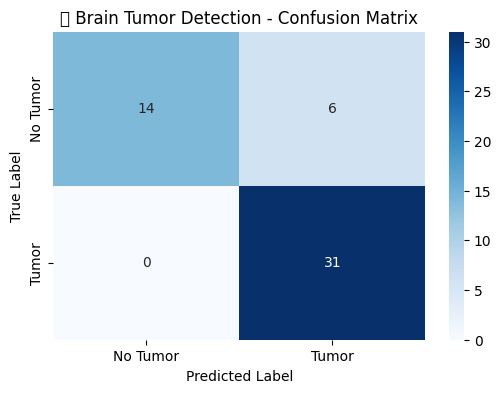

In [26]:
# 📌 Confusion matrix aur classification report print kiya gaya
print("📊 Classification Report:\n", classification_report(y_test, y_pred_classes))

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tumor", "Tumor"], yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("🧠 Brain Tumor Detection - Confusion Matrix")
plt.show()
# ✅ Ham ye kyun likh rahe hain: Yeh graph aur metrics batayenge ki model kaha sahi aur kaha galat tha.
# 🤖 Isse kya hoga: Tum easily dekh sakte ho kitne tumor detect huye sahi se aur kitne galat predict hue.
# 🧾 Iska matlab kya hai: Confusion matrix show karta hai TP, TN, FP, FN — jo medical cases mein important hai.
# 🎯 Analogy: Jaise exam ke result mein dekhna ki tumne kaunse questions sahi kiye aur kaunse galat.
# 📘 Matlab kya hai: `classification_report` precision, recall, f1-score deta hai; `confusion_matrix` overall prediction summary deta hai.


---

In [27]:
def predict_brain_tumor(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))  # 🧠 Same size as training images
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # 📦 Model expects 4D input: (1, 128, 128, 3)

    prediction = model.predict(img)[0][0]  # 🧪 Get probability
    if prediction > 0.5:
        print("🧠 Prediction: Tumor Detected (Yes)")
    else:
        print("🧠 Prediction: No Tumor Detected (No)")

# ✅ Ham ye kyun likh rahe hain: Kisi bhi nayi image ko model se predict karwana hai
# 🤖 Isse kya hoga: Tumhare paas koi bhi brain scan ho, bas uska path do aur output mil jaayega
# 🎯 Analogy: Jaise ek trained doctor ko new MRI dikhake puchhna — "Doctor, tumor hai kya?"


In [28]:
predict_brain_tumor("brain_tumor_dataset/no/1no.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
🧠 Prediction: No Tumor Detected (No)
